# Q1 
- Convert the image to grayscale
- Apply Gussian blur (5x5, sigma = 1.5)
- Compute Sobel gradient magnatude M
- Use: Tlow = p30 , Thigh = p80 in canny edge detection
Team Members: 1. Yuvaraj Nayak 2023A7PS0006U — Implemented Q1 and Q3     2. Abrar 2023A7PS0173U — Implemented Q2 and Q4
This question is done by Yuvaraj Nayak

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

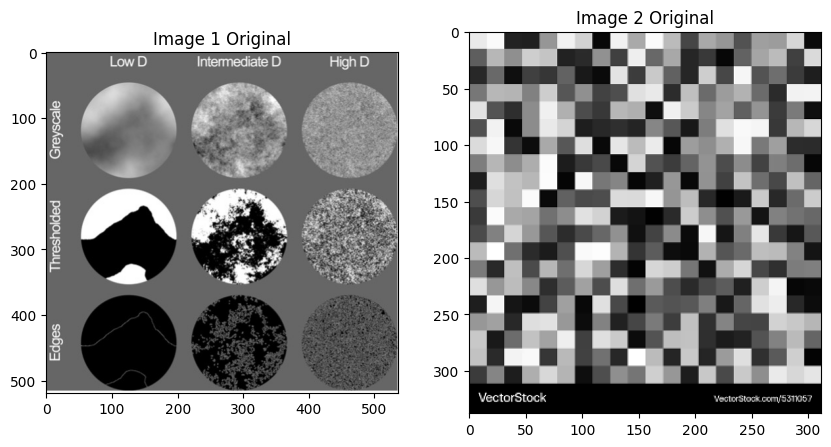

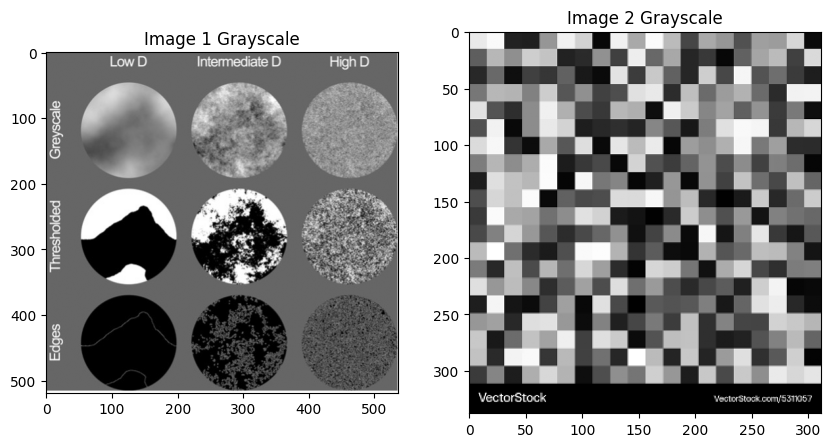

In [8]:
# Load images
img_q1a_bgr = cv2.imread('images/Q1a.jpg')
img_q1b_bgr = cv2.imread('images/Q1b.png')

# Convert to RGB for display
img_q1a_rgb = cv2.cvtColor(img_q1a_bgr, cv2.COLOR_BGR2RGB)
img_q1b_rgb = cv2.cvtColor(img_q1b_bgr, cv2.COLOR_BGR2RGB)

# Display original images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_q1a_rgb)
plt.title('Image 1 Original')
plt.subplot(1, 2, 2)
plt.imshow(img_q1b_rgb)
plt.title('Image 2 Original')
plt.show()

# (a) Convert to grayscale
img_q1a_gray = cv2.cvtColor(img_q1a_bgr, cv2.COLOR_BGR2GRAY)
img_q1b_gray = cv2.cvtColor(img_q1b_bgr, cv2.COLOR_BGR2GRAY)

# Display grayscale images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_q1a_gray, cmap='gray')
plt.title('Image 1 Grayscale')
plt.subplot(1, 2, 2)
plt.imshow(img_q1b_gray, cmap='gray')
plt.title('Image 2 Grayscale')
plt.show()

Processing Image 1:


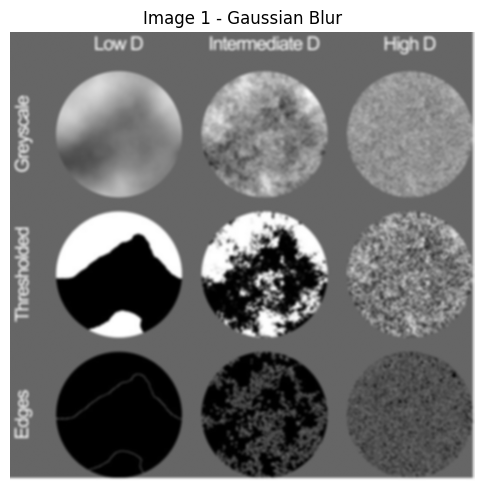

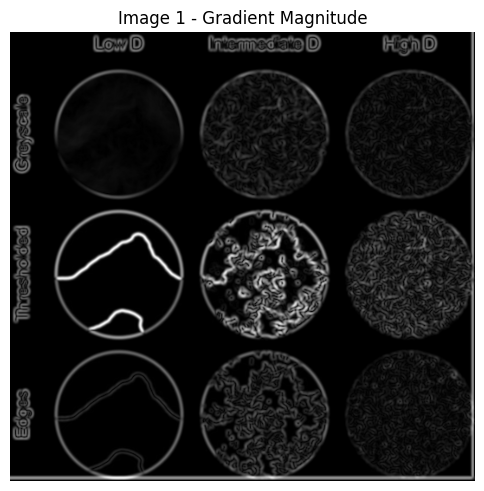

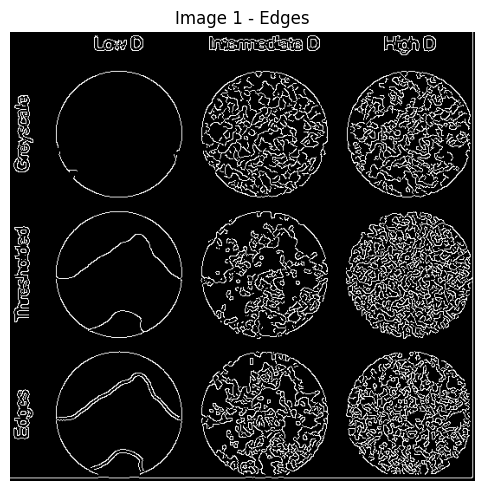

Image 1:
(a) Total edge pixels: 31100
(b) Edge density: 0.1116
(c) Mean gradient magnitude of edge pixels: 117.47

Processing Image 2:


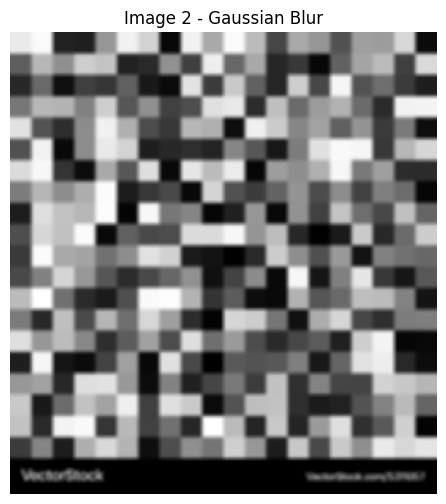

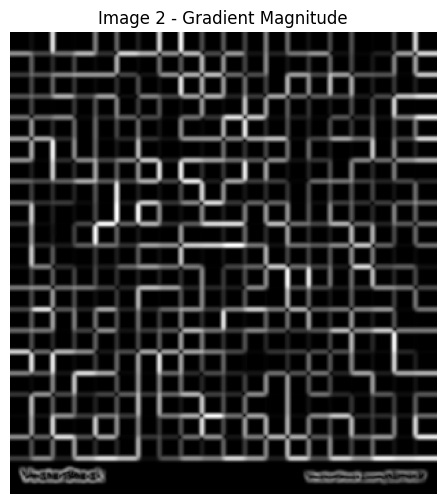

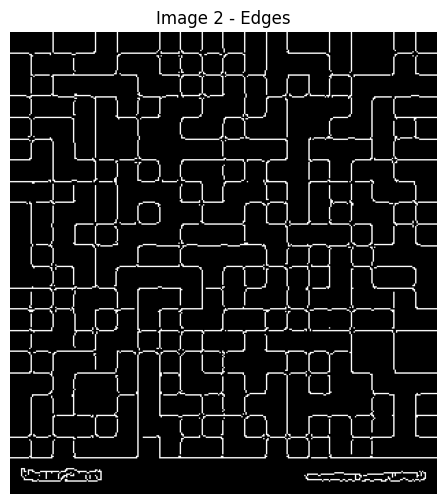

Image 2:
(a) Total edge pixels: 8353
(b) Edge density: 0.0792
(c) Mean gradient magnitude of edge pixels: 248.20


In [9]:
def process_and_report(img_gray, label):
    # (b) Apply Gaussian blur (5x5, sigma=1.5)
    img_blur = cv2.GaussianBlur(img_gray, (5, 5), 1.5)
    
    # Display Blurred Image
    plt.figure(figsize=(6, 6))
    plt.imshow(img_blur, cmap='gray')
    plt.title(f'Image {label} - Gaussian Blur')
    plt.axis('off')
    plt.show()

    # (c) Compute Sobel gradient magnitude M
    gx = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
    gy = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(gx**2 + gy**2)
    
    # Display Gradient Magnitude
    plt.figure(figsize=(6, 6))
    plt.imshow(magnitude, cmap='gray')
    plt.title(f'Image {label} - Gradient Magnitude')
    plt.axis('off')
    plt.show()

    # (d) Use: Tlow=P30, Thigh=P80
    t_low = np.percentile(magnitude, 30)
    t_high = np.percentile(magnitude, 80)

    # Canny edge detection
    edges = cv2.Canny(img_blur, t_low, t_high)
    
    # Display Edges
    plt.figure(figsize=(6, 6))
    plt.imshow(edges, cmap='gray')
    plt.title(f'Image {label} - Edges')
    plt.axis('off')
    plt.show()

    # Metrics
    edge_pixels_mask = edges > 0
    total_edge_pixels = np.sum(edge_pixels_mask)
    total_pixels = img_gray.size
    edge_density = total_edge_pixels / total_pixels
    mean_gradient_magnitude = np.mean(magnitude[edge_pixels_mask]) if total_edge_pixels > 0 else 0

    print(f'Image {label}:')
    print(f'(a) Total edge pixels: {total_edge_pixels}')
    print(f'(b) Edge density: {edge_density:.4f}')
    print(f'(c) Mean gradient magnitude of edge pixels: {mean_gradient_magnitude:.2f}')
    return edges

print('Processing Image 1:')
edges1 = process_and_report(img_q1a_gray, '1')

print('\nProcessing Image 2:')
edges2 = process_and_report(img_q1b_gray, '2')